In [8]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [9]:
url = r'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)

In [10]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
x = titanic.drop(titanic.columns[[0,1,3,8,10,11]], axis=1)
y = titanic['Survived']

In [12]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [13]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [14]:
# One hot encoding

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(dtype=np.int64)
temp = encoder.fit_transform(x[['Sex']])

In [15]:
temp = pd.DataFrame(temp.toarray())
temp

,0,1
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [16]:
# replacing the 'Sex' column with the one hot encoded columns

x.insert(2,'male',temp.iloc[:,-1])
x.insert(3,'female',temp.iloc[:,:1])
x.drop('Sex', axis=1, inplace= True)

In [17]:
x

,Pclass,male,female,Age,SibSp,Parch,Fare
0,3,1,0,22.0,1,0,7.2500
1,1,0,1,38.0,1,0,71.2833
2,3,0,1,26.0,0,0,7.9250
3,1,0,1,35.0,1,0,53.1000
4,3,1,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,2,1,0,27.0,0,0,13.0000
887,1,0,1,19.0,0,0,30.0000
888,3,0,1,NaN,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


In [18]:
x.isnull().sum()

Pclass      0
male        0
female      0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [19]:
# filling the null values with mean()

for i in x.columns:
    x[i].fillna(value = x[i].mean(), inplace=True)

In [20]:
x.isnull().sum()

Pclass    0
male      0
female    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   male    891 non-null    int64  
 2   female  891 non-null    int64  
 3   Age     891 non-null    float64
 4   SibSp   891 non-null    int64  
 5   Parch   891 non-null    int64  
 6   Fare    891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [22]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


### Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size= 0.3)

In [24]:
X_train.shape, X_test.shape

((623, 7), (268, 7))

### Model training

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
clf = DecisionTreeClassifier()

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = clf.predict(X_test)

### Cross val score without hyperparameter tuning

In [29]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, x, y, cv=10)

In [30]:
scores.mean()

0.7789388264669164

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       168
           1       0.80      0.67      0.73       100

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268



# Hyperparameter Tuning

In [32]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':["gini", "entropy"],
    'max_features':[0.25,0.5,0.75,1.0],
    'min_samples_split':[0.25,0.5,0.75,1.0]
}

In [33]:
reg = GridSearchCV( clf , param_grid=param_grid, cv =10)

In [34]:
reg.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 0.75, 1.0],
                         'min_samples_split': [0.25, 0.5, 0.75, 1.0]})

In [35]:
reg.best_score_

0.7994879672299027

In [36]:
params = reg.best_params_

# Obtaining the Cross Validation Score to check the reliability of the model

In [37]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier( criterion = params.get('criterion'),
                              max_depth = params.get('max_depth'),
                              max_features = params.get('max_features'),
                              min_samples_split = params.get('min_samples_split'))
scores = cross_val_score(clf, x, y, cv=10)

In [38]:
scores.mean()

0.7889637952559301

# Plotting the Decision Tree using the best parameters obtained from GridSearch_CV

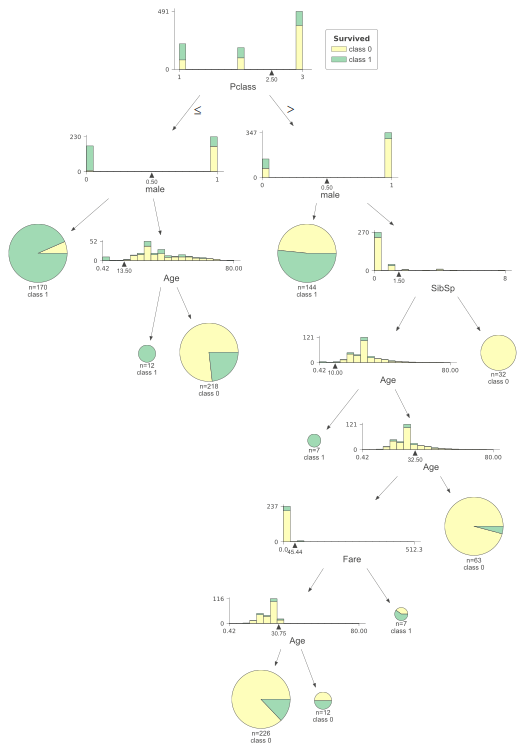

In [39]:
from sklearn import tree
import graphviz.backend as be
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

clf.fit(X_train.values, y_train)

viz = dtreeviz(clf,
              x,
              y,
              target_name = 'Survived',
              feature_names = ['Pclass', 'male', 'female', 'Age', 'SibSp', 'Parch', 'Fare'],
               scale= 1
              )
viz